In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rasterio geopandas matplotlib numpy

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.mask import mask
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

In [ ]:
# @title Data Verification and Preparation

# ============================
#  FILE PATHS FOR ALL THRESHOLDS
# ============================
city_boundary_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Border/Border_Urban_Pristina.geojson'

# Dictionary with all paths
raster_paths = {
    'threshold_0.23': {
        '2017': '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.23/17_phenology_classification_023_threshold.tif',
        '2024': '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.23/phenology_classification_023_threshold.tif'
    },
    'threshold_0.39': {
        '2017': '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.39/17_phenology_classification_039_threshold.tif',
        '2024': '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.39/phenology_classification_039_threshold.tif'
    },
    'threshold_0.55': {
        '2017': '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.55/17_phenology_classification_055_threshold.tif',
        '2024': '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.55/phenology_classification_055_threshold.tif'
    }
}

# ============================
#  VERIFICATION OF ALL RASTERS
# ============================
print("=== VERIFICATION OF ALL THRESHOLDS ===\n")

for threshold_name, paths in raster_paths.items():
    print(f"--- {threshold_name.upper()} ---")

    # Verification 2017
    with rasterio.open(paths['2017']) as src17:
        print(f"2017 CRS: {src17.crs}")
        print(f"2017 Unique values: {np.unique(src17.read(1))}")

    # Verification 2024
    with rasterio.open(paths['2024']) as src24:
        print(f"2024 CRS: {src24.crs}")
        print(f"2024 Unique values: {np.unique(src24.read(1))}")
    print()

# ============================
#  AOI / CITY BOUNDARY
# ============================
aoi = gpd.read_file(city_boundary_path)
print("AOI CRS:", aoi.crs)
print("AOI geometry type:", aoi.geom_type.unique())
print("Number of AOI features:", len(aoi))

=== VERIFICATION OF ALL THRESHOLDS ===

--- THRESHOLD_0.23 ---
2017 CRS: EPSG:32634
2017 Unique values: [0 1 2]
2024 CRS: EPSG:32634
2024 Unique values: [0 1 2]

--- THRESHOLD_0.39 ---
2017 CRS: EPSG:32634
2017 Unique values: [0 1 2]
2024 CRS: EPSG:32634
2024 Unique values: [0 1 2]

--- THRESHOLD_0.55 ---
2017 CRS: EPSG:32634
2017 Unique values: [0 1 2]
2024 CRS: EPSG:32634
2024 Unique values: [0 1 2]

AOI CRS: EPSG:4326
AOI geometry type: ['MultiPolygon']
Number of AOI features: 1


In [ ]:

# @title Data Masking
# Paths (repeated for context)
city_boundary_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Border/Border_Urban_Pristina.geojson'

raster_paths = {
    'threshold_0.23': {
        '2017': '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.23/17_phenology_classification_023_threshold.tif',
        '2024': '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.23/phenology_classification_023_threshold.tif'
    },
    'threshold_0.39': {
        '2017': '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.39/17_phenology_classification_039_threshold.tif',
        '2024': '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.39/phenology_classification_039_threshold.tif'
    },
    'threshold_0.55': {
        '2017': '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.55/17_phenology_classification_055_threshold.tif',
        '2024': '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.55/phenology_classification_055_threshold.tif'
    }
}

# Read AOI and convert CRS to raster CRS
aoi = gpd.read_file(city_boundary_path)
aoi_utm = aoi.to_crs(epsg=32634)

# Dictionary for masked data
masked_data = {}

# Masking for each threshold
for threshold_name, paths in raster_paths.items():
    print(f"Masking {threshold_name}...")

    masked_data[threshold_name] = {}

    # Read and mask 2017 raster
    with rasterio.open(paths['2017']) as src17:
        raster_2017, transform_2017 = mask(src17, aoi_utm.geometry, crop=True)
        raster_2017 = raster_2017[0]  # single band
        masked_data[threshold_name]['2017'] = raster_2017
        masked_data[threshold_name]['transform_2017'] = transform_2017

    # Read and mask 2024 raster
    with rasterio.open(paths['2024']) as src24:
        raster_2024, transform_2024 = mask(src24, aoi_utm.geometry, crop=True)
        raster_2024 = raster_2024[0]  # single band
        masked_data[threshold_name]['2024'] = raster_2024
        masked_data[threshold_name]['transform_2024'] = transform_2024

    # Confirm shapes and unique values
    print(f"{threshold_name} - 2017 shape: {raster_2017.shape}, Unique values: {np.unique(raster_2017)}")
    print(f"{threshold_name} - 2024 shape: {raster_2024.shape}, Unique values: {np.unique(raster_2024)}")
    print()

Masking threshold_0.23...
threshold_0.23 - 2017 shape: (1333, 1190), Unique values: [0 1 2]
threshold_0.23 - 2024 shape: (1333, 1190), Unique values: [0 1 2]

Masking threshold_0.39...
threshold_0.39 - 2017 shape: (1333, 1190), Unique values: [0 1 2]
threshold_0.39 - 2024 shape: (1333, 1190), Unique values: [0 1 2]

Masking threshold_0.55...
threshold_0.55 - 2017 shape: (1333, 1190), Unique values: [0 1 2]
threshold_0.55 - 2024 shape: (1333, 1190), Unique values: [0 1 2]



=== DATA VERIFICATION ===
2017 CRS: EPSG:32634
2017 Unique values: [0 1 2]
2024 CRS: EPSG:32634
2024 Unique values: [0 1 2]
AOI CRS: EPSG:32634
AOI bounds: [ 508740.77891019 4717383.54153357  517510.44657201 4727178.1624051 ]
AOI area (calculated): 39.432845639182986 km²

=== RASTER MASKING ===
2017 raster shape: (1334, 1191)
2024 raster shape: (1334, 1191)

=== AREA INFORMATION ===
Pixel width: 7.37 m
Pixel height: 7.35 m
Single pixel area: 54.17 m² (0.000054 km²)
Total pixels in AOI: 727,862
Total AOI area: 39.43 km²

=== YEAR 2017 (Threshold 0.23) ===
Total vegetation: 500,685 px (68.8%)
Vegetation area: 27.12 km²
  - Deciduous: 465,988 px (64.0%)
  - Evergreen: 34,697 px (4.8%)
Non-vegetation: 227,177 px (31.2%)
Non-vegetation area: 12.31 km²

=== YEAR 2024 (Threshold 0.23) ===
Total vegetation: 478,040 px (65.7%)
Vegetation area: 25.90 km²
  - Deciduous: 407,984 px (56.1%)
  - Evergreen: 70,056 px (9.6%)
Non-vegetation: 249,822 px (34.3%)
Non-vegetation area: 13.53 km²

=== CHANGE

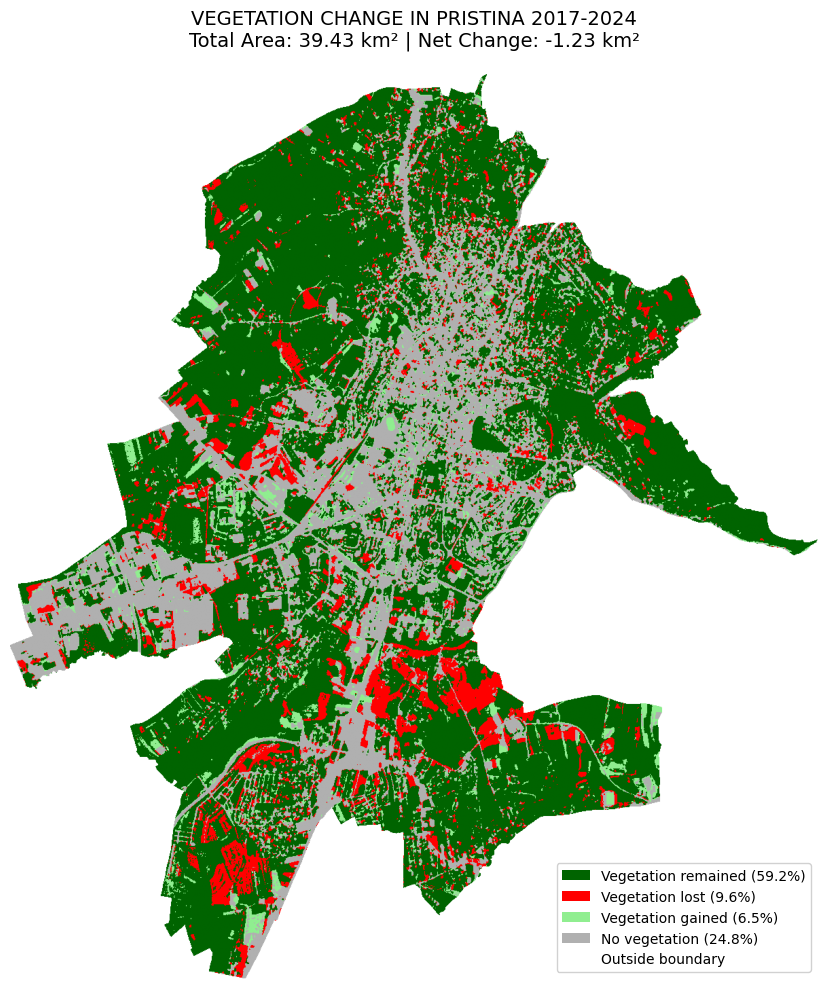


=== SUMMARY ===
Total analyzed area: 39.43 km²
Vegetation in 2017: 27.12 km² (68.8%)
Vegetation in 2024: 25.90 km² (65.7%)
Total vegetation loss: 3.77 km²
Total vegetation gain: 2.55 km²
NET VEGETATION CHANGE: -1.23 km²


In [ ]:

# @title Vegetation Change Analysis Threshold 0.23 (2017 vs 2024)
# ============================
#  FILE PATHS (WITH SAME THRESHOLD)
# ============================
raster_2017_path = '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.23/17_phenology_classification_023_threshold.tif'
raster_2024_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.23/phenology_classification_023_threshold.tif'
aoi_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Border/Border_Urban_Pristina.geojson'

# ============================
#  READ AND VERIFY DATA
# ============================
print("=== DATA VERIFICATION ===")
with rasterio.open(raster_2017_path) as src17:
    print("2017 CRS:", src17.crs)
    print("2017 Unique values:", np.unique(src17.read(1)))
    transform = src17.transform
    profile_2017 = src17.profile

with rasterio.open(raster_2024_path) as src24:
    print("2024 CRS:", src24.crs)
    print("2024 Unique values:", np.unique(src24.read(1)))
    profile_2024 = src24.profile

# Read AOI
aoi = gpd.read_file(aoi_path)
aoi_utm = aoi.to_crs(epsg=32634)
print("AOI CRS:", aoi_utm.crs)
print("AOI bounds:", aoi_utm.total_bounds)
print("AOI area (calculated):", aoi_utm.geometry.area.sum() / 1e6, "km²")

# ============================
#  MASK RASTERS PROPERLY
# ============================
def mask_raster_properly(raster_path, aoi_geom):
    with rasterio.open(raster_path) as src:
        # Get the full raster data
        full_raster = src.read(1)
        transform = src.transform
        crs = src.crs

        # Create mask for AOI (1 inside AOI, 0 outside)
        aoi_mask = rasterio.features.geometry_mask(
            aoi_geom.geometry,
            out_shape=full_raster.shape,
            transform=transform,
            invert=True
        )

        # Apply mask - keep only pixels inside AOI
        masked_raster = full_raster.copy().astype(float)
        masked_raster[~aoi_mask] = np.nan

    return masked_raster, transform, aoi_mask

# Apply masking
print("\n=== RASTER MASKING ===")
raster_2017_masked, transform, aoi_mask = mask_raster_properly(raster_2017_path, aoi_utm)
raster_2024_masked, _, _ = mask_raster_properly(raster_2024_path, aoi_utm)

print("2017 raster shape:", raster_2017_masked.shape)
print("2024 raster shape:", raster_2024_masked.shape)

# ============================
#  CALCULATE AREAS
# ============================
pixel_width = transform[0]
pixel_height = -transform[4]
pixel_area_m2 = pixel_width * pixel_height
pixel_area_km2 = pixel_area_m2 / 1e6

# Total AOI area (pixels with data inside AOI)
total_aoi_pixels = np.sum(~np.isnan(raster_2017_masked))
total_aoi_area_km2 = total_aoi_pixels * pixel_area_km2

print(f"\n=== AREA INFORMATION ===")
print(f"Pixel width: {pixel_width:.2f} m")
print(f"Pixel height: {pixel_height:.2f} m")
print(f"Single pixel area: {pixel_area_m2:.2f} m² ({pixel_area_km2:.6f} km²)")
print(f"Total pixels in AOI: {total_aoi_pixels:,}")
print(f"Total AOI area: {total_aoi_area_km2:.2f} km²")

# ============================
#  VEGETATION ANALYSIS 2017
# ============================
valid_pixels_2017 = raster_2017_masked[~np.isnan(raster_2017_masked)]

veg_2017 = np.sum((valid_pixels_2017 == 1) | (valid_pixels_2017 == 2))
no_veg_2017 = np.sum(valid_pixels_2017 == 0)
deciduous_2017 = np.sum(valid_pixels_2017 == 1)
evergreen_2017 = np.sum(valid_pixels_2017 == 2)

veg_area_2017_km2 = veg_2017 * pixel_area_km2
no_veg_area_2017_km2 = no_veg_2017 * pixel_area_km2

print(f"\n=== YEAR 2017 (Threshold 0.23) ===")
print(f"Total vegetation: {veg_2017:,} px ({veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Vegetation area: {veg_area_2017_km2:.2f} km²")
print(f"  - Deciduous: {deciduous_2017:,} px ({deciduous_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"  - Evergreen: {evergreen_2017:,} px ({evergreen_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Non-vegetation: {no_veg_2017:,} px ({no_veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Non-vegetation area: {no_veg_area_2017_km2:.2f} km²")

# ============================
#  VEGETATION ANALYSIS 2024
# ============================
valid_pixels_2024 = raster_2024_masked[~np.isnan(raster_2024_masked)]

veg_2024 = np.sum((valid_pixels_2024 == 1) | (valid_pixels_2024 == 2))
no_veg_2024 = np.sum(valid_pixels_2024 == 0)
deciduous_2024 = np.sum(valid_pixels_2024 == 1)
evergreen_2024 = np.sum(valid_pixels_2024 == 2)

veg_area_2024_km2 = veg_2024 * pixel_area_km2
no_veg_area_2024_km2 = no_veg_2024 * pixel_area_km2

print(f"\n=== YEAR 2024 (Threshold 0.23) ===")
print(f"Total vegetation: {veg_2024:,} px ({veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Vegetation area: {veg_area_2024_km2:.2f} km²")
print(f"  - Deciduous: {deciduous_2024:,} px ({deciduous_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"  - Evergreen: {evergreen_2024:,} px ({evergreen_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Non-vegetation: {no_veg_2024:,} px ({no_veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Non-vegetation area: {no_veg_area_2024_km2:.2f} km²")

# ============================
#  CHANGE ANALYSIS 2017-2024
# ============================
change_map = np.full(raster_2017_masked.shape, np.nan, dtype=float)

for i in range(raster_2017_masked.shape[0]):
    for j in range(raster_2017_masked.shape[1]):
        if np.isnan(raster_2017_masked[i,j]) or np.isnan(raster_2024_masked[i,j]):
            continue

        val_2017 = raster_2017_masked[i,j]
        val_2024 = raster_2024_masked[i,j]

        if val_2017 in [1,2] and val_2024 in [1,2]:
            change_map[i,j] = 1  # Vegetation remained
        elif val_2017 in [1,2] and val_2024 == 0:
            change_map[i,j] = 2  # Vegetation lost
        elif val_2017 == 0 and val_2024 in [1,2]:
            change_map[i,j] = 3  # Vegetation gained
        elif val_2017 == 0 and val_2024 == 0:
            change_map[i,j] = 0  # No vegetation

# Calculate changes
change_stats = change_map[~np.isnan(change_map)]
total_change_pixels = len(change_stats)

vegetation_remained = np.sum(change_stats == 1)
vegetation_lost = np.sum(change_stats == 2)
vegetation_gained = np.sum(change_stats == 3)
no_vegetation_both = np.sum(change_stats == 0)

# Calculate areas in km²
area_remained = vegetation_remained * pixel_area_km2
area_lost = vegetation_lost * pixel_area_km2
area_gained = vegetation_gained * pixel_area_km2
net_change_km2 = area_gained - area_lost

print(f"\n=== CHANGE ANALYSIS 2017-2024 ===")
print(f"Total analyzed pixels: {total_change_pixels:,}")
print(f"Vegetation remained: {vegetation_remained:,} px ({vegetation_remained/total_change_pixels*100:.1f}%) - {area_remained:.2f} km²")
print(f"Vegetation lost: {vegetation_lost:,} px ({vegetation_lost/total_change_pixels*100:.1f}%) - {area_lost:.2f} km²")
print(f"Vegetation gained: {vegetation_gained:,} px ({vegetation_gained/total_change_pixels*100:.1f}%) - {area_gained:.2f} km²")
print(f"No vegetation (both years): {no_vegetation_both:,} px ({no_vegetation_both/total_change_pixels*100:.1f}%)")
print(f"NET CHANGE: {net_change_km2:+.2f} km²")

# ============================
#  PLOT CHANGE MAP
# ============================
fig, ax = plt.subplots(figsize=(12, 10))

change_colors = ['#B0B0B0', 'darkgreen', 'red', 'lightgreen']
change_cmap = ListedColormap(change_colors)
change_cmap.set_bad('white')

im = ax.imshow(change_map, cmap=change_cmap, vmin=0, vmax=3)

legend_elements = [
    Patch(facecolor='darkgreen', label=f'Vegetation remained ({vegetation_remained/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='red', label=f'Vegetation lost ({vegetation_lost/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='lightgreen', label=f'Vegetation gained ({vegetation_gained/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='#B0B0B0', label=f'No vegetation ({no_vegetation_both/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='white', label='Outside boundary')
]

ax.legend(handles=legend_elements, loc='lower right', framealpha=0.9)
ax.set_title(f"VEGETATION CHANGE IN PRISTINA 2017-2024\n"
            f"Total Area: {total_aoi_area_km2:.2f} km² | "
            f"Net Change: {net_change_km2:+.2f} km²",
            fontsize=14, pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

# ============================
#  SUMMARY STATISTICS
# ============================
print(f"\n=== SUMMARY ===")
print(f"Total analyzed area: {total_aoi_area_km2:.2f} km²")
print(f"Vegetation in 2017: {veg_area_2017_km2:.2f} km² ({veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Vegetation in 2024: {veg_area_2024_km2:.2f} km² ({veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Total vegetation loss: {area_lost:.2f} km²")
print(f"Total vegetation gain: {area_gained:.2f} km²")
print(f"NET VEGETATION CHANGE: {net_change_km2:+.2f} km²")

=== DATA VERIFICATION ===
2017 CRS: EPSG:32634
2017 Unique values: [0 1 2]
2024 CRS: EPSG:32634
2024 Unique values: [0 1 2]
AOI CRS: EPSG:32634
AOI bounds: [ 508740.77891019 4717383.54153357  517510.44657201 4727178.1624051 ]
AOI area (calculated): 39.432845639182986 km²

=== RASTER MASKING ===
2017 raster shape: (1334, 1191)
2024 raster shape: (1334, 1191)

=== AREA INFORMATION ===
Pixel width: 7.37 m
Pixel height: 7.35 m
Single pixel area: 54.17 m² (0.000054 km²)
Total pixels in AOI: 727,862
Total AOI area: 39.43 km²

=== YEAR 2017 (Threshold 0.39) ===
Total vegetation: 262,986 px (36.1%)
Vegetation area: 14.25 km²
  - Deciduous: 261,836 px (36.0%)
  - Evergreen: 1,150 px (0.2%)
Non-vegetation: 464,876 px (63.9%)
Non-vegetation area: 25.18 km²

=== YEAR 2024 (Threshold 0.39) ===
Total vegetation: 248,380 px (34.1%)
Vegetation area: 13.46 km²
  - Deciduous: 237,792 px (32.7%)
  - Evergreen: 10,588 px (1.5%)
Non-vegetation: 479,482 px (65.9%)
Non-vegetation area: 25.98 km²

=== CHANGE 

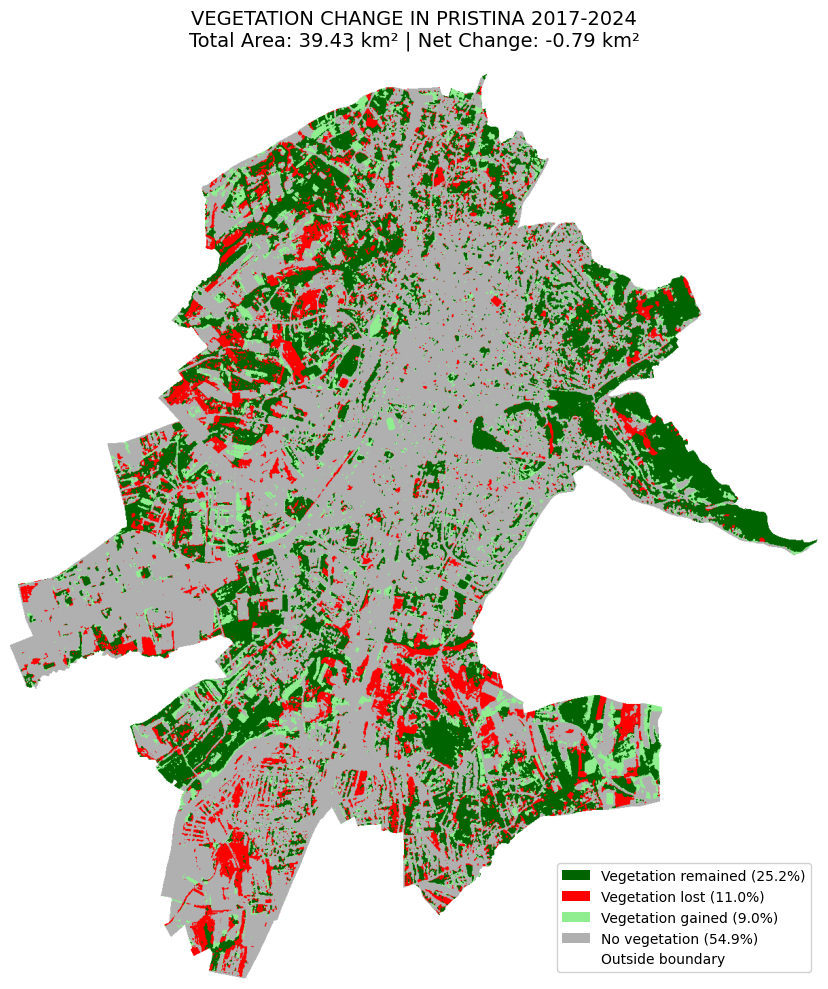


=== SUMMARY ===
Total analyzed area: 39.43 km²
Vegetation in 2017: 14.25 km² (36.1%)
Vegetation in 2024: 13.46 km² (34.1%)
Total vegetation loss: 4.33 km²
Total vegetation gain: 3.53 km²
NET VEGETATION CHANGE: -0.79 km²


In [ ]:

# @title Vegetation Change Analysis Threshold 0.39 (2017 vs 2024)
# ============================
#  FILE PATHS (WITH SAME THRESHOLD)
# ============================
raster_2017_path = '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.39/17_phenology_classification_039_threshold.tif'
raster_2024_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.39/phenology_classification_039_threshold.tif'
aoi_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Border/Border_Urban_Pristina.geojson'

# ============================
#  READ AND VERIFY DATA
# ============================
print("=== DATA VERIFICATION ===")
with rasterio.open(raster_2017_path) as src17:
    print("2017 CRS:", src17.crs)
    print("2017 Unique values:", np.unique(src17.read(1)))
    transform = src17.transform
    profile_2017 = src17.profile

with rasterio.open(raster_2024_path) as src24:
    print("2024 CRS:", src24.crs)
    print("2024 Unique values:", np.unique(src24.read(1)))
    profile_2024 = src24.profile

# Read AOI
aoi = gpd.read_file(aoi_path)
aoi_utm = aoi.to_crs(epsg=32634)
print("AOI CRS:", aoi_utm.crs)
print("AOI bounds:", aoi_utm.total_bounds)
print("AOI area (calculated):", aoi_utm.geometry.area.sum() / 1e6, "km²")

# ============================
#  MASK RASTERS PROPERLY
# ============================
def mask_raster_properly(raster_path, aoi_geom):
    with rasterio.open(raster_path) as src:
        # Get the full raster data
        full_raster = src.read(1)
        transform = src.transform
        crs = src.crs

        # Create mask for AOI (1 inside AOI, 0 outside)
        aoi_mask = rasterio.features.geometry_mask(
            aoi_geom.geometry,
            out_shape=full_raster.shape,
            transform=transform,
            invert=True
        )

        # Apply mask - keep only pixels inside AOI
        masked_raster = full_raster.copy().astype(float)
        masked_raster[~aoi_mask] = np.nan

    return masked_raster, transform, aoi_mask

# Apply masking
print("\n=== RASTER MASKING ===")
raster_2017_masked, transform, aoi_mask = mask_raster_properly(raster_2017_path, aoi_utm)
raster_2024_masked, _, _ = mask_raster_properly(raster_2024_path, aoi_utm)

print("2017 raster shape:", raster_2017_masked.shape)
print("2024 raster shape:", raster_2024_masked.shape)

# ============================
#  CALCULATE AREAS
# ============================
pixel_width = transform[0]
pixel_height = -transform[4]
pixel_area_m2 = pixel_width * pixel_height
pixel_area_km2 = pixel_area_m2 / 1e6

# Total AOI area (pixels with data inside AOI)
total_aoi_pixels = np.sum(~np.isnan(raster_2017_masked))
total_aoi_area_km2 = total_aoi_pixels * pixel_area_km2

print(f"\n=== AREA INFORMATION ===")
print(f"Pixel width: {pixel_width:.2f} m")
print(f"Pixel height: {pixel_height:.2f} m")
print(f"Single pixel area: {pixel_area_m2:.2f} m² ({pixel_area_km2:.6f} km²)")
print(f"Total pixels in AOI: {total_aoi_pixels:,}")
print(f"Total AOI area: {total_aoi_area_km2:.2f} km²")

# ============================
#  VEGETATION ANALYSIS 2017
# ============================
valid_pixels_2017 = raster_2017_masked[~np.isnan(raster_2017_masked)]

veg_2017 = np.sum((valid_pixels_2017 == 1) | (valid_pixels_2017 == 2))
no_veg_2017 = np.sum(valid_pixels_2017 == 0)
deciduous_2017 = np.sum(valid_pixels_2017 == 1)
evergreen_2017 = np.sum(valid_pixels_2017 == 2)

veg_area_2017_km2 = veg_2017 * pixel_area_km2
no_veg_area_2017_km2 = no_veg_2017 * pixel_area_km2

print(f"\n=== YEAR 2017 (Threshold 0.39) ===")
print(f"Total vegetation: {veg_2017:,} px ({veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Vegetation area: {veg_area_2017_km2:.2f} km²")
print(f"  - Deciduous: {deciduous_2017:,} px ({deciduous_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"  - Evergreen: {evergreen_2017:,} px ({evergreen_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Non-vegetation: {no_veg_2017:,} px ({no_veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Non-vegetation area: {no_veg_area_2017_km2:.2f} km²")

# ============================
#  VEGETATION ANALYSIS 2024
# ============================
valid_pixels_2024 = raster_2024_masked[~np.isnan(raster_2024_masked)]

veg_2024 = np.sum((valid_pixels_2024 == 1) | (valid_pixels_2024 == 2))
no_veg_2024 = np.sum(valid_pixels_2024 == 0)
deciduous_2024 = np.sum(valid_pixels_2024 == 1)
evergreen_2024 = np.sum(valid_pixels_2024 == 2)

veg_area_2024_km2 = veg_2024 * pixel_area_km2
no_veg_area_2024_km2 = no_veg_2024 * pixel_area_km2

print(f"\n=== YEAR 2024 (Threshold 0.39) ===")
print(f"Total vegetation: {veg_2024:,} px ({veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Vegetation area: {veg_area_2024_km2:.2f} km²")
print(f"  - Deciduous: {deciduous_2024:,} px ({deciduous_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"  - Evergreen: {evergreen_2024:,} px ({evergreen_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Non-vegetation: {no_veg_2024:,} px ({no_veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Non-vegetation area: {no_veg_area_2024_km2:.2f} km²")

# ============================
#  CHANGE ANALYSIS 2017-2024
# ============================
change_map = np.full(raster_2017_masked.shape, np.nan, dtype=float)

for i in range(raster_2017_masked.shape[0]):
    for j in range(raster_2017_masked.shape[1]):
        if np.isnan(raster_2017_masked[i,j]) or np.isnan(raster_2024_masked[i,j]):
            continue

        val_2017 = raster_2017_masked[i,j]
        val_2024 = raster_2024_masked[i,j]

        if val_2017 in [1,2] and val_2024 in [1,2]:
            change_map[i,j] = 1  # Vegetation remained
        elif val_2017 in [1,2] and val_2024 == 0:
            change_map[i,j] = 2  # Vegetation lost
        elif val_2017 == 0 and val_2024 in [1,2]:
            change_map[i,j] = 3  # Vegetation gained
        elif val_2017 == 0 and val_2024 == 0:
            change_map[i,j] = 0  # No vegetation

# Calculate changes
change_stats = change_map[~np.isnan(change_map)]
total_change_pixels = len(change_stats)

vegetation_remained = np.sum(change_stats == 1)
vegetation_lost = np.sum(change_stats == 2)
vegetation_gained = np.sum(change_stats == 3)
no_vegetation_both = np.sum(change_stats == 0)

# Calculate areas in km²
area_remained = vegetation_remained * pixel_area_km2
area_lost = vegetation_lost * pixel_area_km2
area_gained = vegetation_gained * pixel_area_km2
net_change_km2 = area_gained - area_lost

print(f"\n=== CHANGE ANALYSIS 2017-2024 ===")
print(f"Total analyzed pixels: {total_change_pixels:,}")
print(f"Vegetation remained: {vegetation_remained:,} px ({vegetation_remained/total_change_pixels*100:.1f}%) - {area_remained:.2f} km²")
print(f"Vegetation lost: {vegetation_lost:,} px ({vegetation_lost/total_change_pixels*100:.1f}%) - {area_lost:.2f} km²")
print(f"Vegetation gained: {vegetation_gained:,} px ({vegetation_gained/total_change_pixels*100:.1f}%) - {area_gained:.2f} km²")
print(f"No vegetation (both years): {no_vegetation_both:,} px ({no_vegetation_both/total_change_pixels*100:.1f}%)")
print(f"NET CHANGE: {net_change_km2:+.2f} km²")

# ============================
#  PLOT CHANGE MAP
# ============================
fig, ax = plt.subplots(figsize=(12, 10))

change_colors = ['#B0B0B0', 'darkgreen', 'red', 'lightgreen']
change_cmap = ListedColormap(change_colors)
change_cmap.set_bad('white')

im = ax.imshow(change_map, cmap=change_cmap, vmin=0, vmax=3)

legend_elements = [
    Patch(facecolor='darkgreen', label=f'Vegetation remained ({vegetation_remained/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='red', label=f'Vegetation lost ({vegetation_lost/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='lightgreen', label=f'Vegetation gained ({vegetation_gained/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='#B0B0B0', label=f'No vegetation ({no_vegetation_both/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='white', label='Outside boundary')
]

ax.legend(handles=legend_elements, loc='lower right', framealpha=0.9)
ax.set_title(f"VEGETATION CHANGE IN PRISTINA 2017-2024\n"
            f"Total Area: {total_aoi_area_km2:.2f} km² | "
            f"Net Change: {net_change_km2:+.2f} km²",
            fontsize=14, pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

# ============================
#  SUMMARY STATISTICS
# ============================
print(f"\n=== SUMMARY ===")
print(f"Total analyzed area: {total_aoi_area_km2:.2f} km²")
print(f"Vegetation in 2017: {veg_area_2017_km2:.2f} km² ({veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Vegetation in 2024: {veg_area_2024_km2:.2f} km² ({veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Total vegetation loss: {area_lost:.2f} km²")
print(f"Total vegetation gain: {area_gained:.2f} km²")
print(f"NET VEGETATION CHANGE: {net_change_km2:+.2f} km²")

=== DATA VERIFICATION ===
2017 CRS: EPSG:32634
2017 Unique values: [0 1 2]
2024 CRS: EPSG:32634
2024 Unique values: [0 1 2]
AOI CRS: EPSG:32634
AOI bounds: [ 508740.77891019 4717383.54153357  517510.44657201 4727178.1624051 ]
AOI area (calculated): 39.432845639182986 km²

=== RASTER MASKING ===
2017 raster shape: (1334, 1191)
2024 raster shape: (1334, 1191)

=== AREA INFORMATION ===
Pixel width: 7.37 m
Pixel height: 7.35 m
Single pixel area: 54.17 m² (0.000054 km²)
Total pixels in AOI: 727,862
Total AOI area: 39.43 km²

=== YEAR 2017 (Threshold 0.55) ===
Total vegetation: 42,869 px (5.9%)
Vegetation area: 2.32 km²
  - Deciduous: 42,830 px (5.9%)
  - Evergreen: 39 px (0.0%)
Non-vegetation: 684,993 px (94.1%)
Non-vegetation area: 37.11 km²

=== YEAR 2024 (Threshold 0.55) ===
Total vegetation: 59,505 px (8.2%)
Vegetation area: 3.22 km²
  - Deciduous: 56,545 px (7.8%)
  - Evergreen: 2,960 px (0.4%)
Non-vegetation: 668,357 px (91.8%)
Non-vegetation area: 36.21 km²

=== CHANGE ANALYSIS 2017-

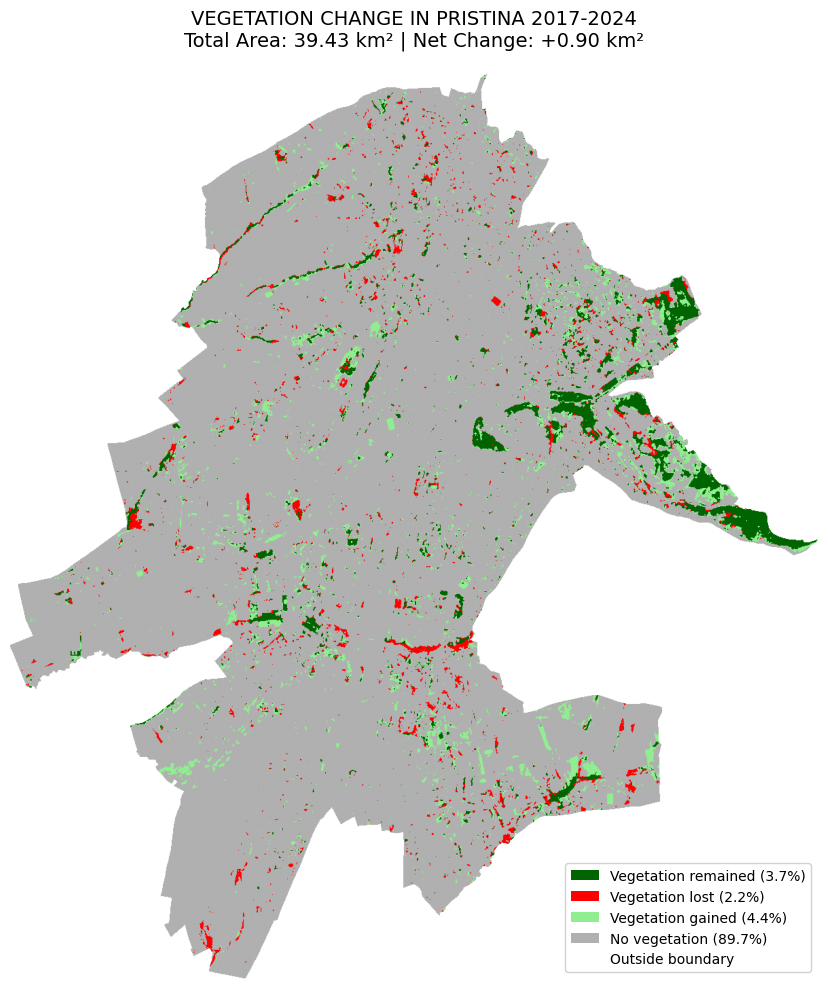


=== SUMMARY ===
Total analyzed area: 39.43 km²
Vegetation in 2017: 2.32 km² (5.9%)
Vegetation in 2024: 3.22 km² (8.2%)
Total vegetation loss: 0.85 km²
Total vegetation gain: 1.75 km²
NET VEGETATION CHANGE: +0.90 km²


In [ ]:
# @title Vegetation Change Analysis Threshold 0.55 (2017 vs 2024)
# ============================
#  FILE PATHS (WITH SAME THRESHOLD)
# ============================
raster_2017_path = '/content/drive/MyDrive/NDVI/NDVI_Python/2017_NDVI_Urban_Zone_Pristina/2017_Threshold_0.55/17_phenology_classification_055_threshold.tif'
raster_2024_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Threshold_0.55/phenology_classification_055_threshold.tif'
aoi_path = '/content/drive/MyDrive/NDVI/NDVI_Python/NDVI_Urban_Zone_Pristina/Border/Border_Urban_Pristina.geojson'

# ============================
#  READ AND VERIFY DATA
# ============================
print("=== DATA VERIFICATION ===")
with rasterio.open(raster_2017_path) as src17:
    print("2017 CRS:", src17.crs)
    print("2017 Unique values:", np.unique(src17.read(1)))
    transform = src17.transform
    profile_2017 = src17.profile

with rasterio.open(raster_2024_path) as src24:
    print("2024 CRS:", src24.crs)
    print("2024 Unique values:", np.unique(src24.read(1)))
    profile_2024 = src24.profile

# Read AOI
aoi = gpd.read_file(aoi_path)
aoi_utm = aoi.to_crs(epsg=32634)
print("AOI CRS:", aoi_utm.crs)
print("AOI bounds:", aoi_utm.total_bounds)
print("AOI area (calculated):", aoi_utm.geometry.area.sum() / 1e6, "km²")

# ============================
#  MASK RASTERS PROPERLY
# ============================
def mask_raster_properly(raster_path, aoi_geom):
    with rasterio.open(raster_path) as src:
        # Get the full raster data
        full_raster = src.read(1)
        transform = src.transform
        crs = src.crs

        # Create mask for AOI (1 inside AOI, 0 outside)
        aoi_mask = rasterio.features.geometry_mask(
            aoi_geom.geometry,
            out_shape=full_raster.shape,
            transform=transform,
            invert=True
        )

        # Apply mask - keep only pixels inside AOI
        masked_raster = full_raster.copy().astype(float)
        masked_raster[~aoi_mask] = np.nan

    return masked_raster, transform, aoi_mask

# Apply masking
print("\n=== RASTER MASKING ===")
raster_2017_masked, transform, aoi_mask = mask_raster_properly(raster_2017_path, aoi_utm)
raster_2024_masked, _, _ = mask_raster_properly(raster_2024_path, aoi_utm)

print("2017 raster shape:", raster_2017_masked.shape)
print("2024 raster shape:", raster_2024_masked.shape)

# ============================
#  CALCULATE AREAS
# ============================
pixel_width = transform[0]
pixel_height = -transform[4]
pixel_area_m2 = pixel_width * pixel_height
pixel_area_km2 = pixel_area_m2 / 1e6

# Total AOI area (pixels with data inside AOI)
total_aoi_pixels = np.sum(~np.isnan(raster_2017_masked))
total_aoi_area_km2 = total_aoi_pixels * pixel_area_km2

print(f"\n=== AREA INFORMATION ===")
print(f"Pixel width: {pixel_width:.2f} m")
print(f"Pixel height: {pixel_height:.2f} m")
print(f"Single pixel area: {pixel_area_m2:.2f} m² ({pixel_area_km2:.6f} km²)")
print(f"Total pixels in AOI: {total_aoi_pixels:,}")
print(f"Total AOI area: {total_aoi_area_km2:.2f} km²")

# ============================
#  VEGETATION ANALYSIS 2017
# ============================
valid_pixels_2017 = raster_2017_masked[~np.isnan(raster_2017_masked)]

veg_2017 = np.sum((valid_pixels_2017 == 1) | (valid_pixels_2017 == 2))
no_veg_2017 = np.sum(valid_pixels_2017 == 0)
deciduous_2017 = np.sum(valid_pixels_2017 == 1)
evergreen_2017 = np.sum(valid_pixels_2017 == 2)

veg_area_2017_km2 = veg_2017 * pixel_area_km2
no_veg_area_2017_km2 = no_veg_2017 * pixel_area_km2

print(f"\n=== YEAR 2017 (Threshold 0.55) ===")
print(f"Total vegetation: {veg_2017:,} px ({veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Vegetation area: {veg_area_2017_km2:.2f} km²")
print(f"  - Deciduous: {deciduous_2017:,} px ({deciduous_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"  - Evergreen: {evergreen_2017:,} px ({evergreen_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Non-vegetation: {no_veg_2017:,} px ({no_veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Non-vegetation area: {no_veg_area_2017_km2:.2f} km²")

# ============================
#  VEGETATION ANALYSIS 2024
# ============================
valid_pixels_2024 = raster_2024_masked[~np.isnan(raster_2024_masked)]

veg_2024 = np.sum((valid_pixels_2024 == 1) | (valid_pixels_2024 == 2))
no_veg_2024 = np.sum(valid_pixels_2024 == 0)
deciduous_2024 = np.sum(valid_pixels_2024 == 1)
evergreen_2024 = np.sum(valid_pixels_2024 == 2)

veg_area_2024_km2 = veg_2024 * pixel_area_km2
no_veg_area_2024_km2 = no_veg_2024 * pixel_area_km2

print(f"\n=== YEAR 2024 (Threshold 0.55) ===")
print(f"Total vegetation: {veg_2024:,} px ({veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Vegetation area: {veg_area_2024_km2:.2f} km²")
print(f"  - Deciduous: {deciduous_2024:,} px ({deciduous_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"  - Evergreen: {evergreen_2024:,} px ({evergreen_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Non-vegetation: {no_veg_2024:,} px ({no_veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Non-vegetation area: {no_veg_area_2024_km2:.2f} km²")

# ============================
#  CHANGE ANALYSIS 2017-2024
# ============================
change_map = np.full(raster_2017_masked.shape, np.nan, dtype=float)

for i in range(raster_2017_masked.shape[0]):
    for j in range(raster_2017_masked.shape[1]):
        if np.isnan(raster_2017_masked[i,j]) or np.isnan(raster_2024_masked[i,j]):
            continue

        val_2017 = raster_2017_masked[i,j]
        val_2024 = raster_2024_masked[i,j]

        if val_2017 in [1,2] and val_2024 in [1,2]:
            change_map[i,j] = 1  # Vegetation remained
        elif val_2017 in [1,2] and val_2024 == 0:
            change_map[i,j] = 2  # Vegetation lost
        elif val_2017 == 0 and val_2024 in [1,2]:
            change_map[i,j] = 3  # Vegetation gained
        elif val_2017 == 0 and val_2024 == 0:
            change_map[i,j] = 0  # No vegetation

# Calculate changes
change_stats = change_map[~np.isnan(change_map)]
total_change_pixels = len(change_stats)

vegetation_remained = np.sum(change_stats == 1)
vegetation_lost = np.sum(change_stats == 2)
vegetation_gained = np.sum(change_stats == 3)
no_vegetation_both = np.sum(change_stats == 0)

# Calculate areas in km²
area_remained = vegetation_remained * pixel_area_km2
area_lost = vegetation_lost * pixel_area_km2
area_gained = vegetation_gained * pixel_area_km2
net_change_km2 = area_gained - area_lost

print(f"\n=== CHANGE ANALYSIS 2017-2024 ===")
print(f"Total analyzed pixels: {total_change_pixels:,}")
print(f"Vegetation remained: {vegetation_remained:,} px ({vegetation_remained/total_change_pixels*100:.1f}%) - {area_remained:.2f} km²")
print(f"Vegetation lost: {vegetation_lost:,} px ({vegetation_lost/total_change_pixels*100:.1f}%) - {area_lost:.2f} km²")
print(f"Vegetation gained: {vegetation_gained:,} px ({vegetation_gained/total_change_pixels*100:.1f}%) - {area_gained:.2f} km²")
print(f"No vegetation (both years): {no_vegetation_both:,} px ({no_vegetation_both/total_change_pixels*100:.1f}%)")
print(f"NET CHANGE: {net_change_km2:+.2f} km²")

# ============================
#  PLOT CHANGE MAP
# ============================
fig, ax = plt.subplots(figsize=(12, 10))

change_colors = ['#B0B0B0', 'darkgreen', 'red', 'lightgreen']
change_cmap = ListedColormap(change_colors)
change_cmap.set_bad('white')

im = ax.imshow(change_map, cmap=change_cmap, vmin=0, vmax=3)

legend_elements = [
    Patch(facecolor='darkgreen', label=f'Vegetation remained ({vegetation_remained/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='red', label=f'Vegetation lost ({vegetation_lost/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='lightgreen', label=f'Vegetation gained ({vegetation_gained/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='#B0B0B0', label=f'No vegetation ({no_vegetation_both/total_change_pixels*100:.1f}%)'),
    Patch(facecolor='white', label='Outside boundary')
]

ax.legend(handles=legend_elements, loc='lower right', framealpha=0.9)
ax.set_title(f"VEGETATION CHANGE IN PRISTINA 2017-2024\n"
            f"Total Area: {total_aoi_area_km2:.2f} km² | "
            f"Net Change: {net_change_km2:+.2f} km²",
            fontsize=14, pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

# ============================
#  SUMMARY STATISTICS
# ============================
print(f"\n=== SUMMARY ===")
print(f"Total analyzed area: {total_aoi_area_km2:.2f} km²")
print(f"Vegetation in 2017: {veg_area_2017_km2:.2f} km² ({veg_2017/len(valid_pixels_2017)*100:.1f}%)")
print(f"Vegetation in 2024: {veg_area_2024_km2:.2f} km² ({veg_2024/len(valid_pixels_2024)*100:.1f}%)")
print(f"Total vegetation loss: {area_lost:.2f} km²")
print(f"Total vegetation gain: {area_gained:.2f} km²")
print(f"NET VEGETATION CHANGE: {net_change_km2:+.2f} km²")